# Goods Recommandation by the Tompson Sampling-based AI engine
- mx can be varied in the simulation

In [37]:
## Declare Packages tu Use 
using Distributions
using Formatting
using Plots
using Zygote
using Random

## Basic Functions
function cost_ts(S_W, S_B, F_W, F_B, means, mx)
    S = S_W * mx + S_B
    F = F_W * mx + F_B
    probs = rand.(Normal.(S, abs.(F)))
    p_arm = argmax(probs)
    rand(Uniform())<means[p_arm] ? (1-probs[p_arm])^2 : (0 -probs[p_arm])^2
end

## Training
function train(
    N = 3,
    means_l = [[0.3, 0.7, 0.5], [0.3, 0.7, 0.5]],
    Nepoch = 100,
    μ = 0.01)

    S_W = zeros(Float64, N)
    S_B = zeros(Float64, N)
    F_W = zeros(Float64, N)
    F_B = zeros(Float64, N)

    S = zeros(Float64, N)
    F = zeros(Float64, N)
    mx = 1
    
    S_list = zeros(Float64, Nepoch+1, N)
    S_list[1,:] = S
    F_abs_list = zeros(Float64, Nepoch+1, N)
    F_abs_list[1,:] = abs.(F)
    mx_list = zeros(Int, Nepoch+1)
    mx_list[1] = mx

    for epoch in range(1, Nepoch)
        G_all = gradient((S_W, S_B, F_W, F_B) -> cost_ts(S_W, S_B, F_W, F_B, means_l[mx],mx), S_W, S_B, F_W, F_B)
        S_W -= μ * G_all[1]
        S_B -= μ * G_all[2]
        F_W -= μ * G_all[3]
        F_B -= μ * G_all[4]    
        mx = rand(1:2)

        S = S_W * mx + S_B
        F = F_W * mx + F_B
        S_list[epoch+1,:] = S    
        F_abs_list[epoch+1,:] = abs.(F)
        mx_list[epoch+1] = mx
    end
    return S_list, F_abs_list, mx_list
end

## Result Plotting
function plot_result(S_list, F_abs_list)
    Nepoch = size(S_list)[1] - 1
    p1 = plot(range(1,Nepoch+1), S_list, ylabel="mean", 
        title = "Gaussian Thompson Sampling, Zygote@Julia", legend=:topleft,
        label = ["Arm 1" "Arm 2" "Arm 3"])
    p2 = plot(range(1,Nepoch+1), F_abs_list, ylabel="variance",
        label = ["Arm 1" "Arm 2" "Arm 3"])
    h = plot(p1, p2, xlabel="Epoch", layout = (2,1))
    display(h)

    lo, hi = 0., 1.
    x = range(lo, hi; length = 100)
    Y = []
    for i in range(1,N)
        y = pdf.(Normal(S_list[end,i],abs.(F_abs_list[end,i])),x)
        if i == 1
            Y = y
        else
            Y = [Y y]
        end
    end

    h = plot(x, Y, xlabel = "Prob", ylabel = "Bins", 
        title = "Final Gaussian Distrubtion of Each Arm", 
        label = ["Arm 1" "Arm 2" "Arm 3"])
    display(h)
end

function plot_result_mx(S_list, F_abs_list, mx)
    S_list_each = S_list[findall(x->x==2, mx_list), :]
    F_abs_list_each = F_abs_list[findall(x->x==2, mx_list), :]
    plot_result(S_list_each, F_abs_list_each)
end

plot_result_mx (generic function with 1 method)

In [38]:
N = 3
means_l = [[0.3, 0.7, 0.5], [0.3, 0.7, 0.5]]
Nepoch = 2000
μ = 0.01
S_list, F_abs_list, mx_list = train(N, means_l, Nepoch, μ);

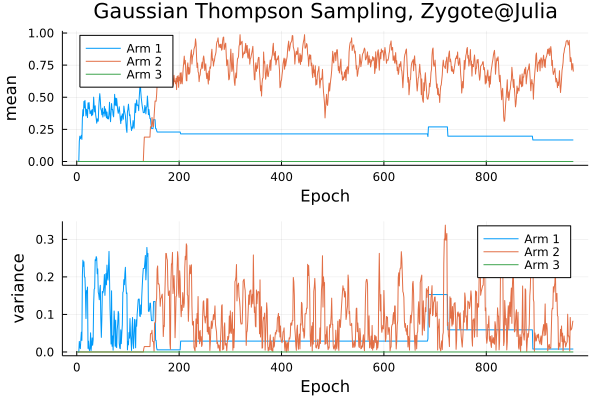

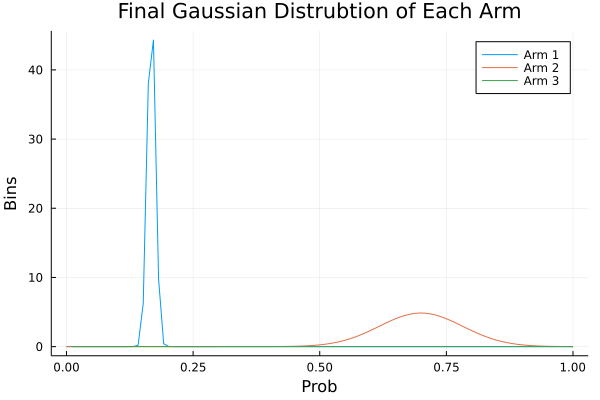

In [39]:
plot_result_mx(S_list, F_abs_list, 1)

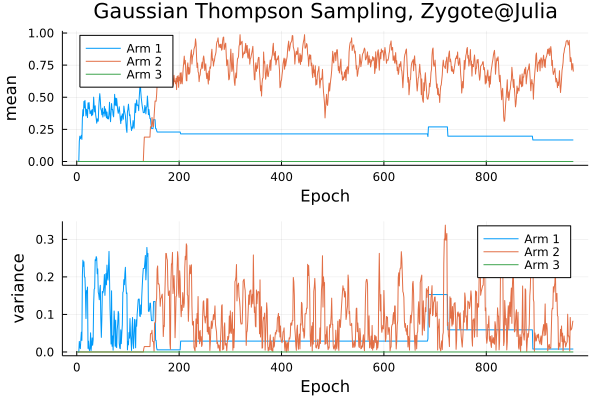

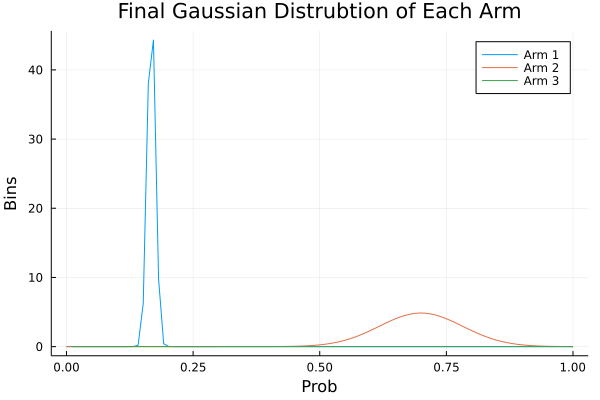

In [40]:
plot_result_mx(S_list, F_abs_list, 2)